
    [ ] Choose your target. Which column in your tabular dataset will you predict?
    [ ] Is your problem regression or classification?
    [ ] How is your target distributed?
        Classification: How many classes? Are the classes imbalanced?
        Regression: Is the target right-skewed? If so, you may want to log transform the target.
    [ ] Choose which observations you will use to train, validate, and test your model.
        Are some observations outliers? Will you exclude them?
        Will you do a random split or a time-based split?
    [ ] Choose your evaluation metric(s).
        Classification: Is your majority class frequency > 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    [ ] Begin to clean and explore your data.
    [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?


In [1]:
import os
import pandas as pd
import numpy as np
import warnings
from ast import literal_eval
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce 
from sklearn.metrics import r2_score, mean_squared_error, explained_variance_score
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
os.getcwd()

'C:\\Users\\SKrishna\\Documents\\GitHub\\airbnb'

In [2]:
pd.set_option('display.max_columns',999)

In [3]:
listings = pd.read_csv('listings_1.csv', low_memory=False,parse_dates=['last_scraped', 'first_review', 'last_review', 'host_since'])

In [4]:
listings.shape

(9023, 106)

In [5]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20191121092259,2019-11-21,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, (Phone number h...","This beautiful, gracious home has been complet...","Gorgeous, architect remodeled, (Phone number h...",none,Madrona is a hidden gem of a neighborhood. It ...,"We adhere to a 10pm -9am quiet hour schedule, ...",NaN,Guests can access any part of the house.,We are a family who live next door and are ava...,NaN,NaN,NaN,https://a0.muscache.com/im/pictures/02973ad3-a...,NaN,2536,https://www.airbnb.com/users/show/2536,Megan,2008-08-26,"Seattle, Washington, United States",I welcome guests from all walks of life and ev...,within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/016a1...,https://a0.muscache.com/im/pictures/user/016a1...,Minor,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,f,"Seattle, WA, United States",Madrona,Madrona,Central Area,Seattle,WA,98122,Seattle,"Seattle, WA",US,United States,47.61082,-122.29082,t,House,Entire home/apt,9,2.5,4.0,4.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",NaN,$296.00,NaN,NaN,$500.00,$250.00,8,$25.00,7,1000,7,7,1000,1000,7.0,1000.0,5 days ago,t,6,29,59,59,2019-11-21,29,9,2008-09-15,2019-10-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,NaN,"{WASHINGTON,"" Seattle"","" WA""}",t,f,strict_14_with_grace_period,f,f,2,2,0,0,0.21
1,5682,https://www.airbnb.com/rooms/5682,20191121092259,2019-11-21,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,My personal favorite places to dine are: • Ma...,Bus 120 is right outside and goes into downtow...,PRIVATE ENTRANCE WITH PRIVATE BATH Queen size ...,"I'm more than happy to meet with guests, but u...",**PLEASE READ** NO SMOKING NO VAPING NO MARIJU...,NaN,NaN,https://a0.muscache.com/im/pictures/5ec89f9d-8...,NaN,8993,https://www.airbnb.com/users/show/8993,Maddy,2009-03-03,"Seattle, Washington, United States",Hello my name is Maddy. I enjoy meeting and ho...,NaN,NaN,NaN,f,https://a0.muscache.com/im/users/8993/profile_...,https://a0.muscache.com/im/users/8993/profile_...,South Delridge,1.0,1.0,"['email', 'ph

In [6]:
#since we are not planning to use most of the textual data, i've filtered out the list of columns that are useful as a list cols.

In [7]:
cols = ['id', 'host_id', 'host_since', 'host_verifications', 'host_is_superhost', 'zipcode', 'bathrooms', 'bedrooms', 
        'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 
        'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights','maximum_nights', 'calendar_updated', 
        'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 
        'number_of_reviews', 'first_review', 'last_review', 'review_scores_rating','review_scores_accuracy', 
        'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
        'review_scores_value', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', 
        'require_guest_phone_verification','calculated_host_listings_count', 'reviews_per_month']

In [8]:
df = listings[cols]

In [9]:
df.dtypes

id                                           int64
host_id                                      int64
host_since                          datetime64[ns]
host_verifications                          object
host_is_superhost                           object
zipcode                                     object
bathrooms                                  float64
bedrooms                                   float64
beds                                       float64
bed_type                                    object
amenities                                   object
square_feet                                float64
price                                       object
weekly_price                                object
monthly_price                               object
security_deposit                            object
cleaning_fee                                object
guests_included                              int64
extra_people                                object
minimum_nights                 

In [10]:
#lets see the number of null values here

In [11]:
df.isnull().sum()

id                                     0
host_id                                0
host_since                             4
host_verifications                     0
host_is_superhost                      4
zipcode                              169
bathrooms                              2
bedrooms                               7
beds                                   3
bed_type                               0
amenities                              0
square_feet                         8620
price                                  0
weekly_price                        8044
monthly_price                       8272
security_deposit                    1541
cleaning_fee                         769
guests_included                        0
extra_people                           0
minimum_nights                         0
maximum_nights                         0
calendar_updated                       0
has_availability                       0
availability_30                        0
availability_60 

In [12]:
temp = df.isnull().sum() / df.shape[0]
temp[temp > 0]

host_since                     0.000443
host_is_superhost              0.000443
zipcode                        0.018730
bathrooms                      0.000222
bedrooms                       0.000776
beds                           0.000332
square_feet                    0.955336
weekly_price                   0.891500
monthly_price                  0.916768
security_deposit               0.170786
cleaning_fee                   0.085227
first_review                   0.139754
last_review                    0.139754
review_scores_rating           0.146293
review_scores_accuracy         0.146514
review_scores_cleanliness      0.146514
review_scores_checkin          0.146625
review_scores_communication    0.146404
review_scores_location         0.146625
review_scores_value            0.146514
reviews_per_month              0.139754
dtype: float64

In [13]:
df = df.drop(columns=['weekly_price','monthly_price','square_feet'])

In [14]:
df.head(2)

,id,host_id,host_since,host_verifications,host_is_superhost,zipcode,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2318,2536,2008-08-26,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,98122,2.5,4.0,4.0,Real Bed,"{Internet,Wifi,Kitchen,""Free parking on premis...",$296.00,$500.00,$250.00,8,$25.00,7,1000,5 days ago,t,6,29,59,59,29,2008-09-15,2019-10-31,100.0,10.0,10.0,10.0,10.0,10.0,10.0,t,strict_14_with_grace_period,f,f,2,0.21
1,5682,8993,2009-03-03,"['email', 'phone', 'manual_online', 'reviews',...",f,98106,1.0,0.0,1.0,Real Bed,"{TV,Internet,Wifi,""Free street parking"",Heatin...",$48.00,$120.00,$45.00,1,$5.00,3,14,8 months ago,t,0,0,0,0,462,2010-03-21,2018-11-24,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,strict_14_with_grace_period,f,t,1,3.92


In [15]:
df['price'] = df['price'].str.replace('$','')

In [16]:
df['price'] = df['price'].str.replace(',','')

In [17]:
df['security_deposit'] = df['security_deposit'].str.replace('$','')

In [18]:
df['security_deposit'] = df['security_deposit'].str.replace('$','')

In [19]:
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$','')

In [20]:
df['extra_people'] = df['extra_people'].str.replace('$','')

In [21]:
df['extra_people'] = df['extra_people'].str.replace(',','')

In [22]:
df['price'] = df['price'].astype('float')

In [23]:
df['extra_people'] = df['extra_people'].astype('float')

In [24]:
df['host_is_superhost'] = df['host_is_superhost'].astype('str')

In [25]:
df['has_availability'] = df['has_availability'].astype('str')

In [26]:
df['instant_bookable'] = df['instant_bookable'].astype('str')

In [27]:
df['require_guest_profile_picture'] = df['require_guest_profile_picture'].astype('str')

In [28]:
df['require_guest_phone_verification'] = df['require_guest_phone_verification'].astype('str')

In [29]:
df['host_is_superhost'] = df['host_is_superhost'].str.replace('t','1')
df['host_is_superhost'] = df['host_is_superhost'].str.replace('f','0')
df['has_availability'] = df['has_availability'].str.replace('t','1')
df['has_availability'] = df['has_availability'].str.replace('f','0')
df['instant_bookable'] = df['instant_bookable'].str.replace('t','1')
df['instant_bookable'] = df['instant_bookable'].str.replace('f','0')
df['require_guest_profile_picture'] = df['require_guest_profile_picture'].str.replace('t','1')
df['require_guest_profile_picture'] = df['require_guest_profile_picture'].str.replace('f','0')
df['require_guest_phone_verification'] = df['require_guest_phone_verification'].str.replace('t','1')
df['require_guest_phone_verification'] = df['require_guest_phone_verification'].str.replace('f','0')

df_now = df['host_since'].max()
df['host_days'] = df.host_since.map(lambda x: (df_now - x).days)

df_now_first_review = df['first_review'].max()
df['first_review_days'] = df.first_review.map(lambda x: (df_now_first_review - x).days)

df_now_last_review = df['last_review'].max()
df['last_review_days'] = df.last_review.map(lambda x: (df_now_last_review - x).days)

df = df.drop(columns=['host_since','first_review','last_review'])

df['price'] = df['price'].astype('float')

df = df.drop(columns = ['calendar_updated'])

In [30]:
df.isnull().sum() / df.shape[0] #percentage of null values.

id                                  0.000000
host_id                             0.000000
host_verifications                  0.000000
host_is_superhost                   0.000000
zipcode                             0.018730
bathrooms                           0.000222
bedrooms                            0.000776
beds                                0.000332
bed_type                            0.000000
amenities                           0.000000
price                               0.000000
security_deposit                    0.170786
cleaning_fee                        0.085227
guests_included                     0.000000
extra_people                        0.000000
minimum_nights                      0.000000
maximum_nights                      0.000000
has_availability                    0.000000
availability_30                     0.000000
availability_60                     0.000000
availability_90                     0.000000
availability_365                    0.000000
number_of_

In [31]:
imp_mode = SimpleImputer(strategy='most_frequent')
df[['host_is_superhost', 
    'zipcode', 
    'host_days',
    'reviews_per_month',
    'first_review_days',
    'last_review_days',
    'security_deposit',
    'cleaning_fee']] = imp_mode.fit_transform(df[['host_is_superhost', 
                                                  'zipcode', 
                                                  'host_days',
                                                  'reviews_per_month',
                                                  'first_review_days',
                                                  'last_review_days',
                                                  'security_deposit',
                                                  'cleaning_fee']])


imp_mean = SimpleImputer(strategy='mean')
df[['bathrooms', 
    'bedrooms', 
    'beds',
    'review_scores_rating',
    'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value']] = imp_mode.fit_transform(df[['bathrooms', 
    'bedrooms', 
    'beds',
    'review_scores_rating',
    'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value']])


In [32]:
## 1) Zipcode: remove unnecessary details or typos
## extract numbers 

df.zipcode = df.zipcode.str.extract(r'(\d+)(?<![^0-9])')[0]


## 4) host_verifications 
### seattle
df.host_verifications = df.host_verifications.replace(['[]', 'None'], "['none']")
### define categorical dummy dataframe
cat = pd.get_dummies(df.host_verifications.map(literal_eval).apply(pd.Series).stack(), prefix='host_ver').sum(level=0)

## drop host_verifications from df
df = df.drop(columns=['host_verifications'])

## drop amenities from sea_df, bos_df
df = df.drop(columns=['amenities'])


In [33]:
df.head()

,id,host_id,host_is_superhost,zipcode,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_days,first_review_days,last_review_days
0,2318,2536,1,98122,2.5,4.0,4.0,Real Bed,296.0,500.00,250.00,8,25.0,7,1000,1,6,29,59,59,29,100.0,10.0,10.0,10.0,10.0,10.0,10.0,1,strict_14_with_grace_period,0,0,2,0.21,4103.0,4082.0,21.0
1,5682,8993,0,98106,1.0,0.0,1.0,Real Bed,48.0,120.00,45.00,1,5.0,3,14,1,0,0,0,0,462,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,strict_14_with_grace_period,0,1,1,3.92,3914.0,3530.0,362.0
2,6606,14942,0,98103,1.0,1.0,1.0,Real Bed,90.0,200.00,40.00,2,10.0,2,1125,1,0,19,49,49,150,92.0,9.0,9.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0,0,3,1.19,3860.0,3777.0,54.0
3,9419,30559,1,98108,3.0,1.0,1.0,Real Bed,62.0,100.00,10.00,1,15.0,2,60,1,29,54,84,359,146,93.0,10.0,10.0,10.0,10.0,10.0,10.0,0,moderate,1,1,8,1.29,3755.0,3399.0,30.0
4,9460,30832,1,98101,1.0,1.0,1.0,Real Bed,99.0,0.00,45.00,1,15.0,3,29,1,11,34,56,138,455,98.0,10.0,10.0,10.0,10.0,10.0,10.0,1,moderate,0,0,4,3.65,3754.0,3732.0,12.0


In [34]:
df = df[(df['calculated_host_listings_count'] >= np.percentile(df['calculated_host_listings_count'], 0.5)) & 
        (df['calculated_host_listings_count'] <= np.percentile(df['calculated_host_listings_count'], 99.5))]

In [35]:
y = df['price']

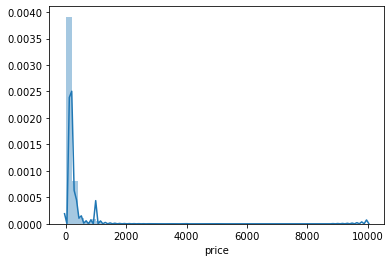

In [36]:
sns.distplot(y)

In [37]:
y.describe()

count    9023.000000
mean      170.371384
std       220.663850
min         0.000000
25%        80.000000
50%       119.000000
75%       186.500000
max      9999.000000
Name: price, dtype: float64

In [38]:
import numpy as np
y_log = np.log1p(y)

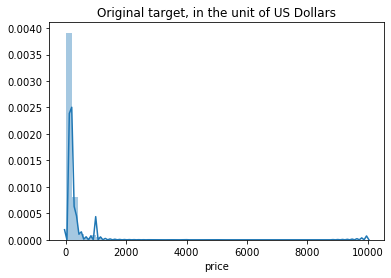

In [39]:
import matplotlib.pyplot as plt
sns.distplot(y)
plt.title('Original target, in the unit of US Dollars');

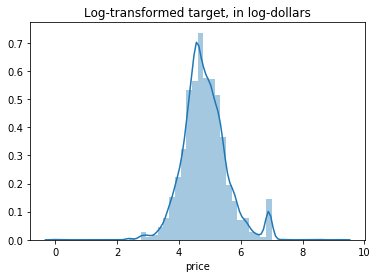

In [40]:
sns.distplot(y_log)
plt.title('Log-transformed target, in log-dollars');

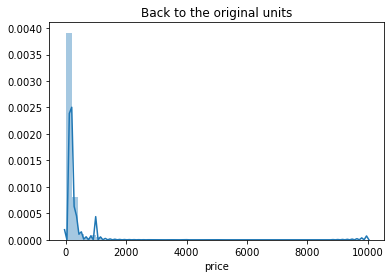

In [41]:
y_untransformed = np.expm1(y_log)
sns.distplot(y_untransformed)
plt.title('Back to the original units');

In [42]:
train,test = train_test_split(df, test_size=0.25, random_state=42)

In [43]:
train,val = train_test_split(train, test_size=0.25, random_state=42)

In [44]:
target = 'price'
features = train.columns.drop([target])

In [45]:
X_train = train[features]
y_train = train[target]

X_val = val[features]
y_val = val[target]

X_test = test[features]
y_test = test[target]

In [46]:
train.shape,val.shape,test.shape

((5075, 37), (1692, 37), (2256, 37))

In [47]:
X_train.head()

,id,host_id,host_is_superhost,zipcode,bathrooms,bedrooms,beds,bed_type,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,host_days,first_review_days,last_review_days
5665,25966547,5486995,1,98118,1.0,1.0,1.0,Real Bed,0.00,25.00,1,15.0,1,1125,1,28,36,66,66,88,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,flexible,0,0,2,5.15,2440.0,510.0,5.0
2585,14264764,379579,1,98104,1.0,1.0,1.0,Real Bed,0.00,50.00,1,0.0,2,1125,1,0,0,0,0,65,97.0,10.0,10.0,9.0,10.0,9.0,10.0,1,moderate,0,0,1,2.22,3209.0,876.0,57.0
5424,24801305,47859391,0,98122,1.0,0.0,1.0,Real Bed,0.00,35.00,2,30.0,1,1125,1,21,51,81,123,146,94.0,10.0,10.0,9.0,10.0,10.0,9.0,0,strict_14_with_grace_period,0,0,3,7.77,1481.0,561.0,16.0
8617,38579264,48005494,1,98115,1.0,0.0,0.0,Real Bed,500.00,300.00,1,0.0,30,1125,1,4,4,23,298,0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict,0,0,237,1.00,1479.0,442.0,4.0
117,447488,450548,1,98102,1.0,1.0,1.0,Real Bed,250.00,80.00,1,0.0,1,29,1,0,0,0,0,58,94.0,9.0,9.0,10.0,10.0,10.0,9.0,1,moderate,0,1,2,0.65,3168.0,2655.0,60.0


In [48]:
from sklearn.model_selection import cross_val_score


pipeline = make_pipeline(
    ce.TargetEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
)

k = 3
scores = cross_val_score(pipeline, X_train, y_train, cv=k, 
                         scoring='neg_mean_absolute_error')
print(f'MAE for {k} folds:', -scores)

MAE for 3 folds: [47.05768913 46.51072695 47.32935541]


In [49]:
-scores.mean()

46.96592382888318

In [50]:
pipeline.fit(X_train, y_train);

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [52]:
y_pred = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
print(f'Test MAE: ${mae:,.0f}')


Test MAE: $45


In [53]:
r2 = r2_score(y_val, y_pred)
print("======= Result =======")
print("R2 Score: {:.4f}".format(r2))

======= Result =======
R2 Score: 0.5512


In [54]:
compare_df = pd.DataFrame({'y_val': y_val, 'y_pred': y_pred})
ind = np.random.choice(len(compare_df), 10, replace=False)
compare_df.iloc[ind]

,y_val,y_pred
2039,175.0,106.25
6146,95.0,102.69
2130,124.0,98.20
5798,100.0,160.55
7763,165.0,176.58
3462,150.0,79.79
7962,122.0,97.67
3083,100.0,129.28
2985,149.0,233.40
2394,329.0,269.78


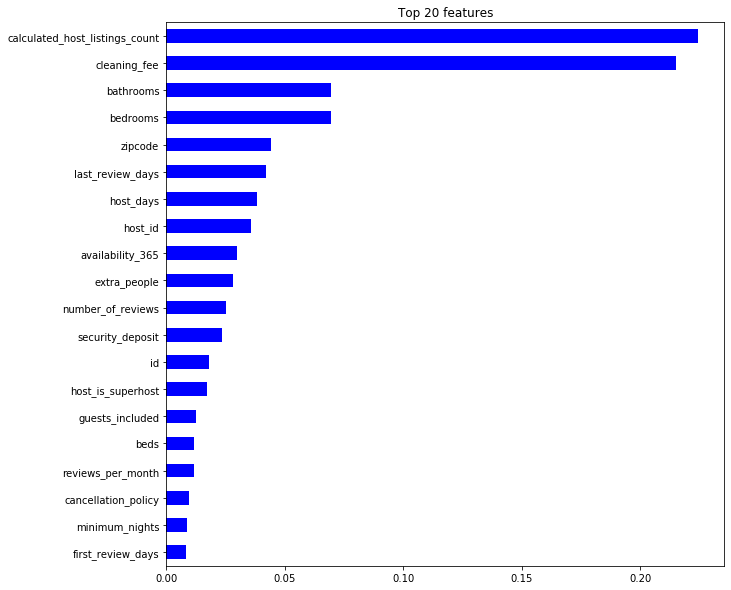

In [213]:
# Get feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='blue');

In [ ]:
#single feature PDP

In [64]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 72

from pdpbox.pdp import pdp_isolate, pdp_plot

feature='bathrooms'

isolated = pdp_isolate(
    model = pipeline,
    dataset = X_val,
    model_features = X_val.columns,
    feature = feature
)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x271aa4121d0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x271aa0c0940>})

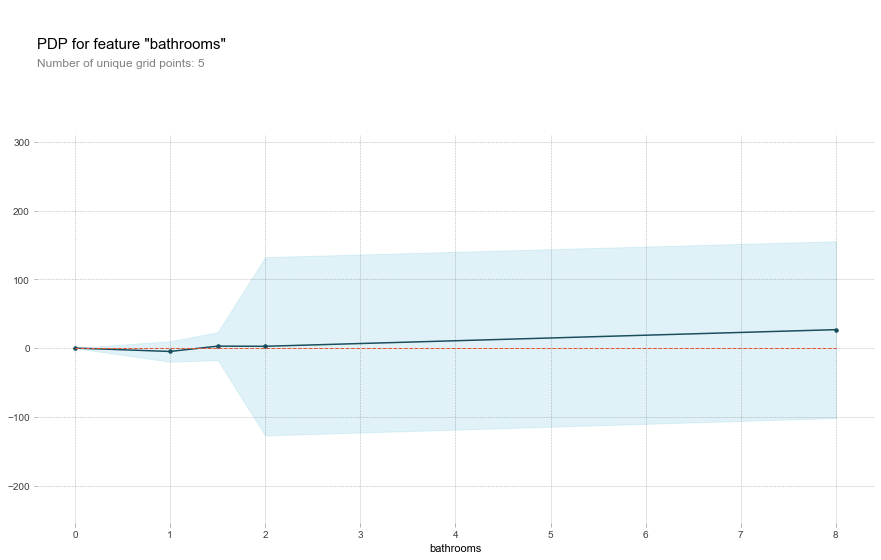

In [65]:
pdp_plot(isolated, feature_name=feature)

(0, 3)

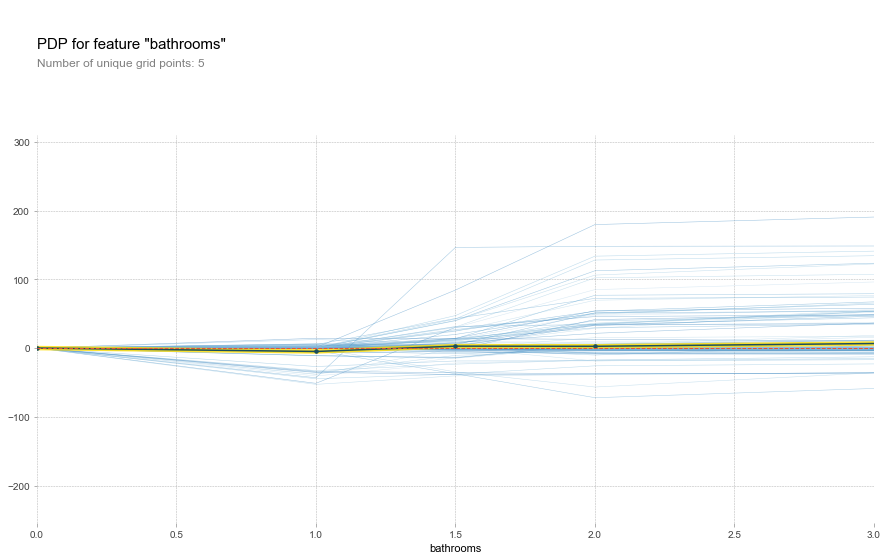

In [68]:
pdp_plot(isolated, feature_name=feature, plot_lines=True, frac_to_plot=100)
plt.xlim(0, 3)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x271a8994898>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x271a897d390>})

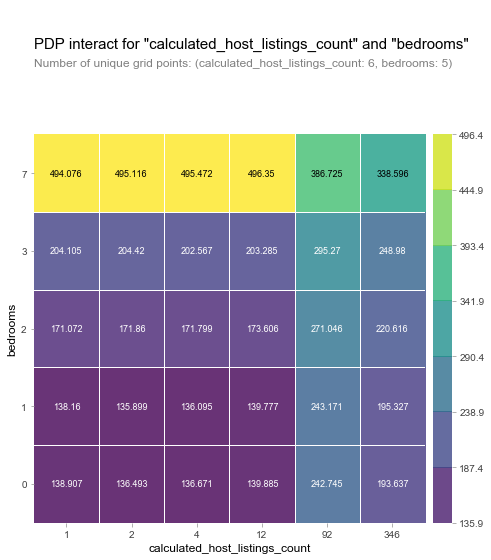

In [71]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features=['calculated_host_listings_count','bedrooms']

interaction = pdp_interact(
    model=pipeline,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features)